<p style="text-align: center;">
Tabel 1 - Deskripsi Feature
</p> 

| Code | Description |
|-------|--------------|
| `MEMBER_NO-b` | ID Member |
| `FFP_DATE` | Frequent Flyer Program Join Date |
| `FIRST_FLIGHT_DATE` | Tanggal Penerbangan pertama |
| `GENDER` | Jenis Kelamin |
| `FFP_TIER` | Tier dari Frequent Flyer Program |
| `WORK_CITY` | Kota Asal |
| `WORK_PROVINCE` | Provinsi Asal |
| `WORK_COUNTRY` | Negara Asal |
| `AGE` | Umur Customer |
| `LOAD_TIME` | Tanggal data diambil |
| `FLIGHT_COUNT` | Jumlah penerbangan Customer |
| `BP_SUM` | Rencana Perjalanan |
| `SUM_YR_1` | Fare Revenue |
| `SUM_YR_2` | Votes Prices |
| `SEG_KM_SUM` | Total jarak(km) penerbangan yg sudah dilakukan |
| `LAST_FLIGHT_DATE` | Tanggal penerbangan terakhir |
| `LAST_TO_END` | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| `AVG_INTERVAL` | Rata-rata jarak waktu |
| `MAX_INTERVAL` | Maksimal jarak waktu |
| `EXCHANGE_COUNT` | Jumlah penukaran |
| `avg_discount` | Rata rata discount yang didapat customer |
| `Points_Sum` | Jumlah poin yang didapat customer |
| `Point_NotFlight` | point yang tidak digunakan oleh members |

# Load Dataset

In [14]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Mengimpor pustaka yang diperlukan
import pandas as pd  # Mengimpor pustaka Pandas untuk manipulasi data
import numpy as np   # Mengimpor pustaka NumPy untuk operasi numerik
import seaborn as sns  # Mengimpor pustaka Seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk visualisasi data
%matplotlib inline  
# Menggunakan tampilan visualisasi data yang terintegrasi

# Mengimpor modul preprocessing dari pustaka sklearn
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk penskalaan fitur
from sklearn.cluster import KMeans  # Mengimpor KMeans untuk analisis clustering
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk menentukan jumlah cluster yang optimal
from yellowbrick.cluster import SilhouetteVisualizer  # Mengimpor SilhouetteVisualizer untuk evaluasi clustering
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi

# Menonaktifkan peringatan
import warnings
warnings.filterwarnings("ignore")

In [16]:
# read dataset

df = pd.read_csv('dataset\dataset.csv')
df

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6            .   
1          28065  2/19/2007          8/3/2007    Male         6          NaN   
2          55106   2/1/2007         8/30/2007    Male         6            .   
3          21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4          39546  4/10/2009         4/15/2009    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375  5/20/2011          6/5/2013  Female         4    guangzhou   
62984      36041   3/8/2010         9/14/2013    Male         4       foshan   
62985      45690  3/30/2006         12/2/2006  Female         4    guangzhou   
62986      61027   2/6/2013         2/14/2013  Female         4    guangzhou   
62987      61340  2/17/2013         2/17/2013  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0           beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1           beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2           beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3                CA           US  64.0  3/31/2014  ...  125500.0      281336   
4           guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
...             ...          ...   ...        ...  ...       ...         ...   
62983     guangdong           CN  25.0  3/31/2014  ...       0.0        1134   
62984     guangdong           CN  38.0  3/31/2014  ...       0.0        8016   
62985     guangdong           CN  43.0  3/31/2014  ...       0.0        2594   
62986     guangdong           CN  36.0  3/31/2014  ...       0.0        3934   
62987             .           CN  29.0  3/31/2014  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0             3/31/2014            1      3.483254           18   
1             3/25/2014            7      5.194245           17   
2             3/21/2014           11      5.298507           18   
3            12/26/2013           97     27.863636           73   
4             3/27/2014            5      4.788079           47   
...                 ...          ...           ...          ...   
62983          6/9/2013          297      4.000000            4   
62984          1/3/2014           89     37.000000           60   
62985          3/3/2014           29    166.000000          166   
62986         2/26/2013          400     12.000000           12   
62987         2/23/2013          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
1                  29      1.252314      415768               33  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
...               ...           ...         ...              ...  
62983               1      0.000000       12318               22  
62984              14      0.000000      106972               43  
62985               0      0.000000           0                0  
62986               0      0.000000           0                0  
62987               0      0.000000           0                0  

[62988 rows x 23 columns]

# EDA

## Analisis Statistik

### Cek Tipedata

In [17]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Feature seharusnya memiliki tipe data `datetime`` : `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE`
- Feature `AGE` sebaiknya `integer`

In [18]:
# jumlah record dan feature
print('Total Record :', df.shape[0])
print('Total Features :', df.shape[1])

Total Record : 62988
Total Features : 23


In [19]:
# sampling dataset
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
20915      40486   2/13/2010         2/16/2010    Male         4   
23048      40432   12/8/2009        12/18/2009    Male         4   
51981      45056   8/20/2006        11/23/2010    Male         4   
28204      23508  11/30/2011        11/30/2011  Female         4   
27914      26752   8/15/2007         8/15/2007    Male         4   

           WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  \
20915      zhanjiang     guangdong           CN  37.0  3/31/2014  ...   
23048       shanghai      shanghai           CN  42.0  3/31/2014  ...   
51981   zhengzhoushi    henansheng           CN  47.0  3/31/2014  ...   
28204  Dongdaemun-gu         Seoul           KR  30.0  3/31/2014  ...   
27914       shanghai   shanghaishi           CN  37.0  3/31/2014  ...   

       SUM_YR_2  SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
20915    2337.0       18053         7/28/2013          248     36.583333   
23048       0.0       12488          7/9/2013          267     51.250000   
51981       0.0        2458         6/12/2012          659     21.000000   
28204    2730.0       12612         7/14/2013          262     74.833333   
27914       0.0       14613          4/2/2013          365     43.625000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
20915          220               0      0.648244       16481               15  
23048          230               1      0.843330        9810                1  
51981           21               0      1.000000        3831                1  
28204          156               0      0.645171        6135                0  
27914           89               1      0.564172        7330                1  

[5 rows x 23 columns]

### Cek Missing Value

In [20]:
# cek data yang hilang
counts = df.isna().sum().sort_values(ascending=False)

# persentase data yang hilang
percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

null_counts     %
WORK_PROVINCE             3248  5.16
WORK_CITY                 2269  3.60
SUM_YR_1                   551  0.87
AGE                        420  0.67
SUM_YR_2                   138  0.22
WORK_COUNTRY                26  0.04
GENDER                       3  0.00
MEMBER_NO                    0  0.00
LAST_FLIGHT_DATE             0  0.00
Points_Sum                   0  0.00
avg_discount                 0  0.00
EXCHANGE_COUNT               0  0.00
MAX_INTERVAL                 0  0.00
AVG_INTERVAL                 0  0.00
LAST_TO_END                  0  0.00
BP_SUM                       0  0.00
SEG_KM_SUM                   0  0.00
FFP_DATE                     0  0.00
FLIGHT_COUNT                 0  0.00
LOAD_TIME                    0  0.00
FFP_TIER                     0  0.00
FIRST_FLIGHT_DATE            0  0.00
Point_NotFlight              0  0.00

In [21]:
# Persentase record/rows yang mengandung missing value
df_nan = df[df.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df)*100, 2)}%')

Persentase missing value pada dataset : 7.51%


- Terdapat 5 feature yang memiliki missing value : `WORK_PROVINCE`, `WORK_CITY`, `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`
- Dataset memiliki 7.51% missing value (dibawah 10%)

### Cek Duplikat

In [22]:
# cek duplikat
df.duplicated().any()

False

Tidak ada yang duplikat

### Pengelompokan Data Berdasarkan Tipe Data

In [23]:
# cek feature yang memiliki nilai numerik
nums = df.loc[:, (df.dtypes != object)].columns.tolist()
print(nums)
print(f'Jumlah feature numerikal : {len(nums)}')

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Jumlah feature numerikal : 15


In [24]:
# cek data yang memiliki nilai kategorik
cats = df.loc[:, (df.dtypes == object)].columns.tolist()
print(cats)
print(f'Jumlah feature kategorikal : {len(cats)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah feature kategorikal : 8


In [25]:
# split data berdasarkan kategori
nums = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

### Statistika Deskriptif

In [26]:
# analisis deskriptif data numerikal
df[nums].describe().T

count          mean           std    min           25%  \
MEMBER_NO        62988.0  31494.500000  18183.213715    1.0  15747.750000   
AGE              62568.0     42.476346      9.885915    6.0     35.000000   
FFP_TIER         62988.0      4.102162      0.373856    4.0      4.000000   
FLIGHT_COUNT     62988.0     11.839414     14.049471    2.0      3.000000   
BP_SUM           62988.0  10925.081254  16339.486151    0.0   2518.000000   
SUM_YR_1         62437.0   5355.376064   8109.450147    0.0   1003.000000   
SUM_YR_2         62850.0   5604.026014   8703.364247    0.0    780.000000   
SEG_KM_SUM       62988.0  17123.878691  20960.844623  368.0   4747.000000   
LAST_TO_END      62988.0    176.120102    183.822223    1.0     29.000000   
AVG_INTERVAL     62988.0     67.749788     77.517866    0.0     23.370370   
MAX_INTERVAL     62988.0    166.033895    123.397180    0.0     79.000000   
EXCHANGE_COUNT   62988.0      0.319775      1.136004    0.0      0.000000   
avg_discount     62988.0      0.721558      0.185427    0.0      0.611997   
Points_Sum       62988.0  12545.777100  20507.816700    0.0   2775.000000   
Point_NotFlight  62988.0      2.728155      7.364164    0.0      0.000000   

                          50%           75%       max  
MEMBER_NO        31494.500000  47241.250000   62988.0  
AGE                 41.000000     48.000000     110.0  
FFP_TIER             4.000000      4.000000       6.0  
FLIGHT_COUNT         7.000000     15.000000     213.0  
BP_SUM            5700.000000  12831.000000  505308.0  
SUM_YR_1          2800.000000   6574.000000  239560.0  
SUM_YR_2          2773.000000   6845.750000  234188.0  
SEG_KM_SUM        9994.000000  21271.250000  580717.0  
LAST_TO_END        108.000000    268.000000     731.0  
AVG_INTERVAL        44.666667     82.000000     728.0  
MAX_INTERVAL       143.000000    228.000000     728.0  
EXCHANGE_COUNT       0.000000      0.000000      46.0  
avg_discount         0.711856      0.809476       1.5  
Points_Sum        6328.500000  14302.500000  985572.0  
Point_NotFlight      0.000000      1.000000     140.0

**Observasi :**
- Mayoritas feature memiliki nilai mean > median yang menandakan feature cenderung berdistribusi positively skewed.
- `MEMBER_NO`, `FFP_TIER` dan `avg_discount` memiliki nilai mean yang hampir sama dengan median yang menandakan fitur tersebut cenderung mendekati distribusi normal.
- Nilai maksimal pada feature `AGE` adalah 110, usia ini terlalu tua.
- Terdapat nilai 0 yaitu `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`.

In [27]:
# analisis deskriptif data kategorikal
df[cats].describe().T

count unique        top   freq
GENDER             62985      2       Male  48134
WORK_CITY          60719   3234  guangzhou   9386
WORK_PROVINCE      59740   1165  guangdong  17509
WORK_COUNTRY       62962    118         CN  57748
FFP_DATE           62988   3068  1/13/2011    184
FIRST_FLIGHT_DATE  62988   3406  2/16/2013     96
LOAD_TIME          62988      1  3/31/2014  62988
LAST_FLIGHT_DATE   62988    731  3/31/2014    959

In [28]:
# Persentase
print(f'% Male      : {round(48134/62985*100, 2)}')
print(f'% guangzhou : {round(9386/60719*100, 2)}')
print(f'% guangdong : {round(17509/59740*100, 2)}')
print(f'% CN        : {round(57748/62962*100, 2)}')

% Male      : 76.42
% guangzhou : 15.46
% guangdong : 29.31
% CN        : 91.72


**Observasi :**
- Sebagian besar 76.42% user yang menggunakan maskapai adalah Laki-laki
- Mayoritas user yang menggunakan maskapai berasal dari kota guangzhou dengan persentase sebesar 15.46%
- Mayoritas user yang menggunakan maskapai berasal dari provinsi guangdong dengan persentase sebesar 29.31%
- Kode CN merupakan negara mayoritas user berasal dengan persentase sebesar 91.72%


In [29]:
# Jumlah cats
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
GENDER
Male      48134
Female    14851
Name: count, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
WORK_CITY
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: count, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
WORK_PROVINCE
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: count, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
WORK_COUNTRY
CN    57748
HK      991
JP      875
KR  

### Rangkuman

**Hasil :**
- Dataset memiliki 23 feature dengan record 62988.
- Dataset memiliki 15 feature numerikal dan 8 feature kategorikal.
- Rekomendasi tipe data feature `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` sebaiknya menggunakan datetime dan `AGE` menggunakan integer.
- Dataset memiliki missing value dibawah 10%
- Tidak terdapat record yang duplikat.
- Distribusi feature rata-rata positively skewed.
- Terdapat usia maksimal 110 tahun.
- Nilai 0 pada feature `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight` kemungkinan mempresentasikan user tidak mendapat atau melakukan action dari feature tersebut.
- Nilai 0 pada feature `SUM_YR_1`, `SUM_YR_2`,  ` AVG_INTERVAL`, `MAX_INTERVAL` kemungkinan user tidak melakukan penerbangan, hal tersebut dapat dianalisis lebih lanjut.
- Mayoritas user adalah Laki-laki berasal dari China, provinsi Guangdong, kota Guangzhou

## Analisis Univariate

### Fitur Numerik

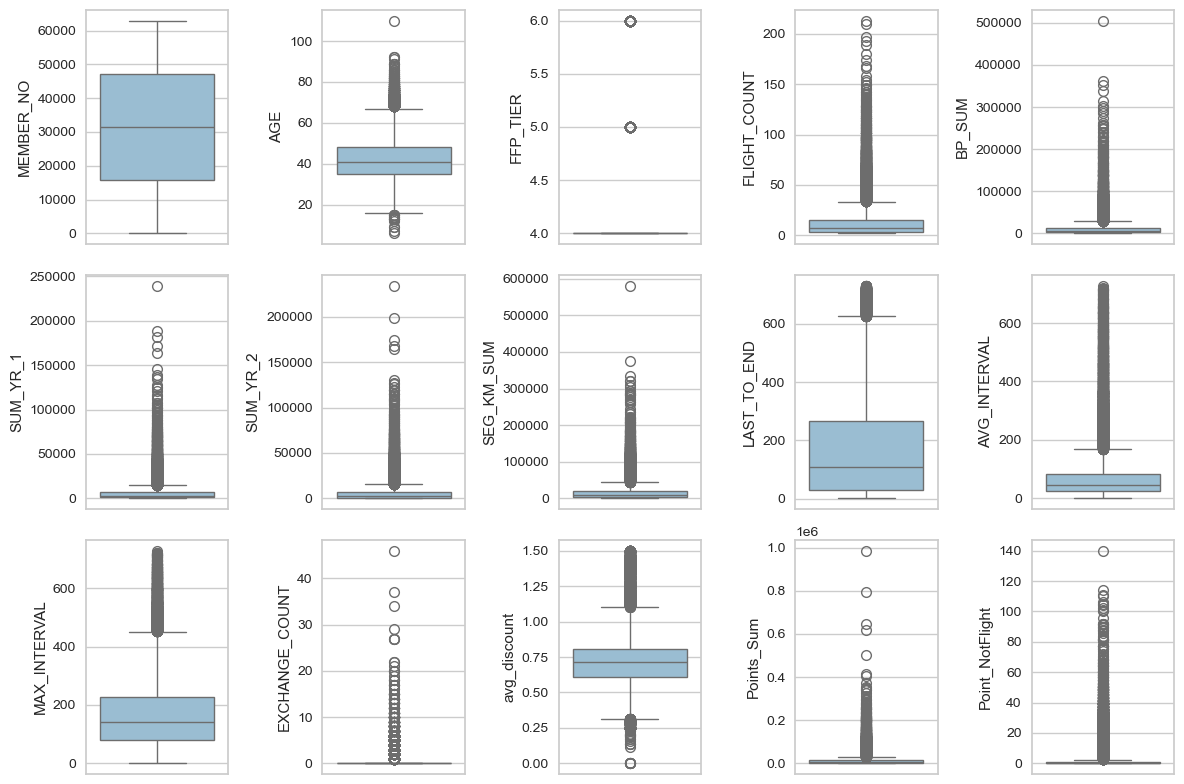

In [30]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

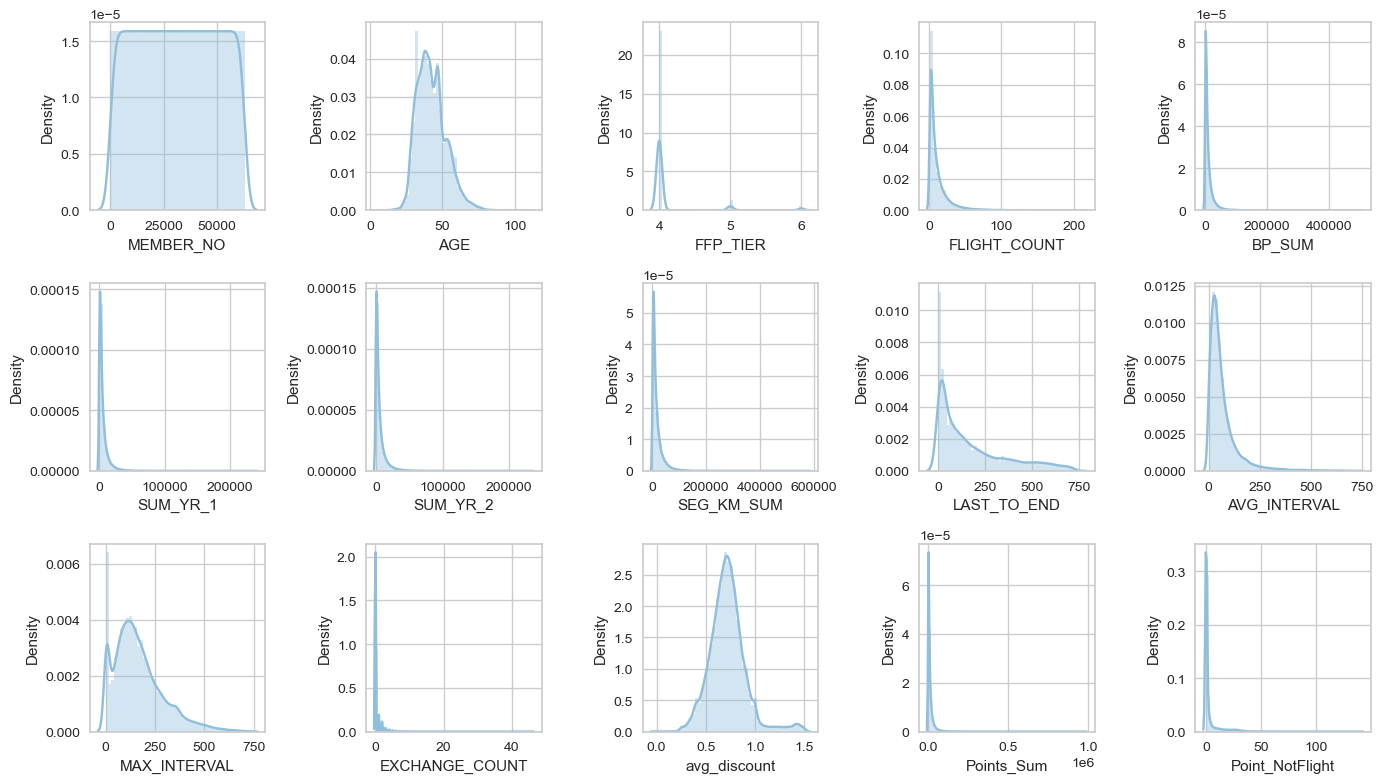

In [31]:
# cek distribusi dan skewness dengan displot
plt.figure(figsize=(14, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='#91bfdb')
    plt.tight_layout()

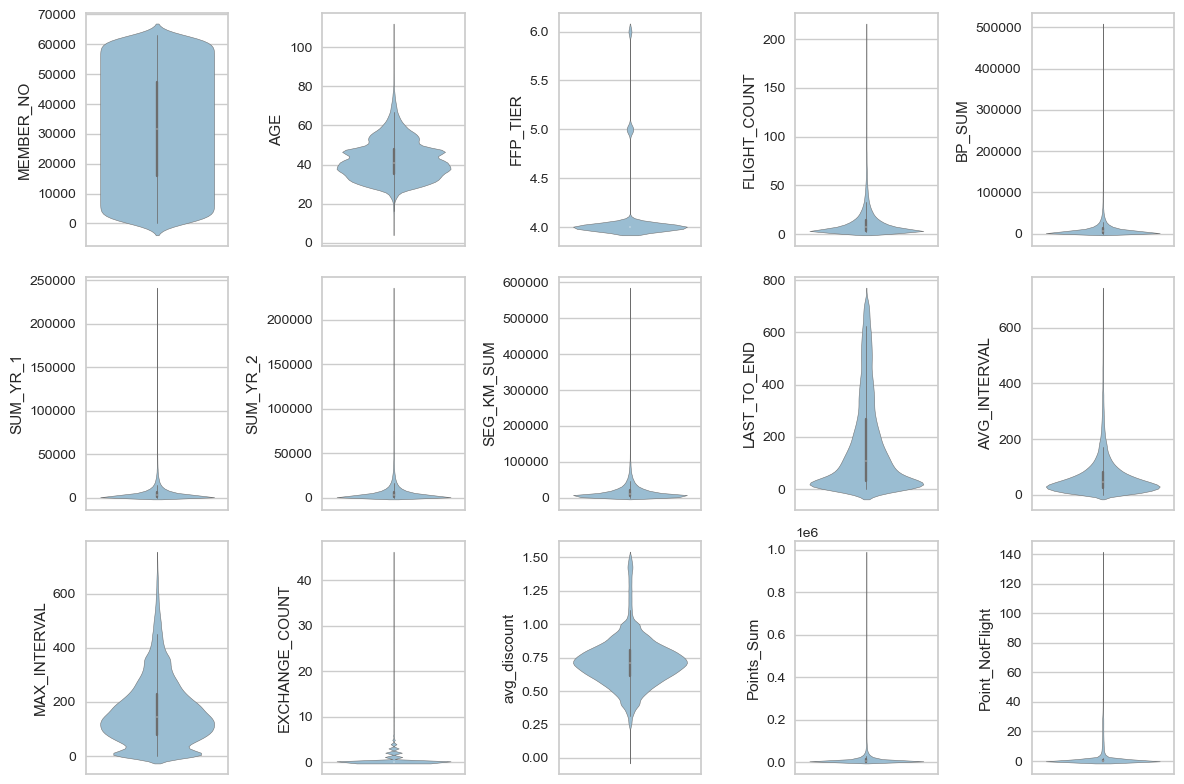

In [32]:
# cek distribusi dengan violinplot
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

### Fitur Kategorikal

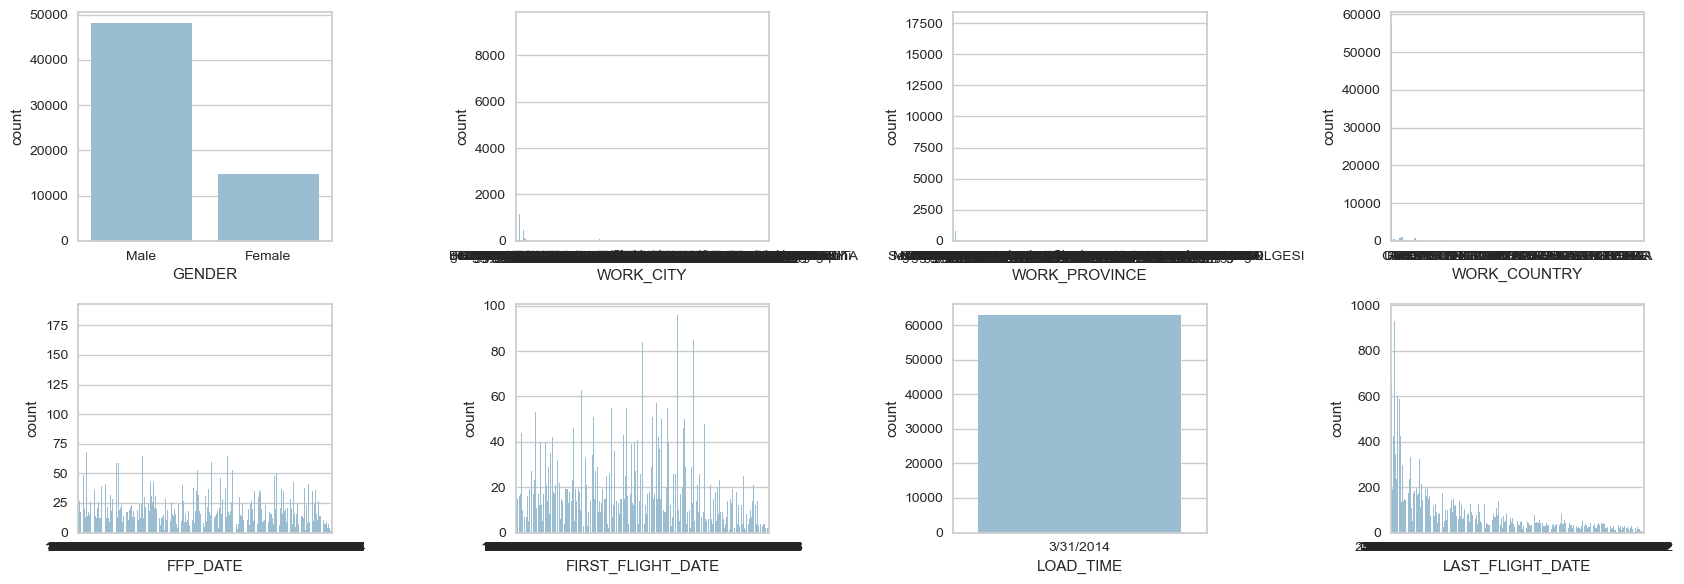

In [83]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=df[cats[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

Tidak terlalu banyak insight yang didapatkan, sehingga diputuskan untuk membuat visualisasi top 10 untuk `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`


Text(0, 0.5, 'count')

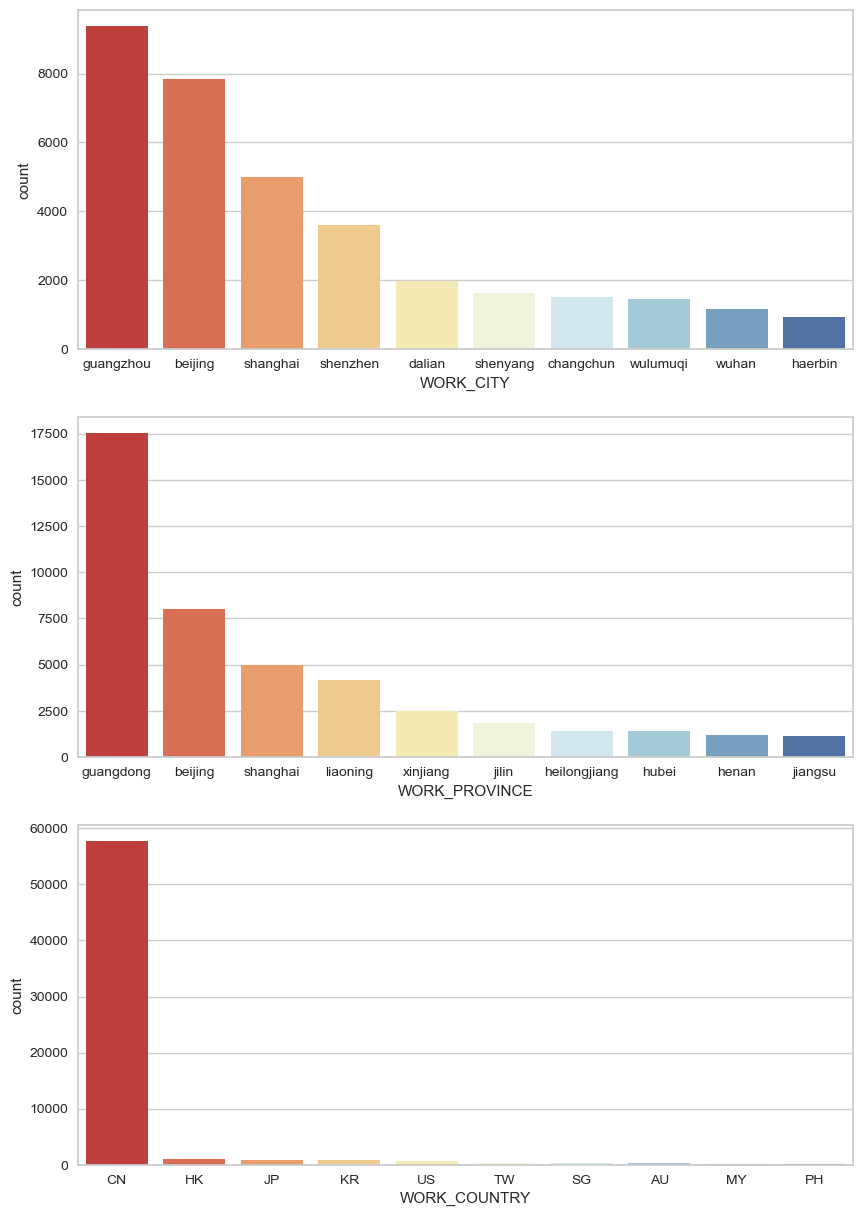

In [34]:
# membuat grafik dengan format 3 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,15))

# work_city
# mengambil jumlah kota dengan user 10 terbanyak
work_city_top10 = df['WORK_CITY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0], palette=('RdYlBu'))
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
# mengambil jumlah province dengan user 10 terbanyak
work_province_top10 = df['WORK_PROVINCE'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1], palette=('RdYlBu'))
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
# mengambil jumlah country dengan user 10 terbanyak
work_country_top10 = df['WORK_COUNTRY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2], palette=('RdYlBu'))
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')

Visualisasi `FFP_DATE`, `FIRST_FLIGHT_DATE` dan `LAST_FLIGHT_DATE` per tahun

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

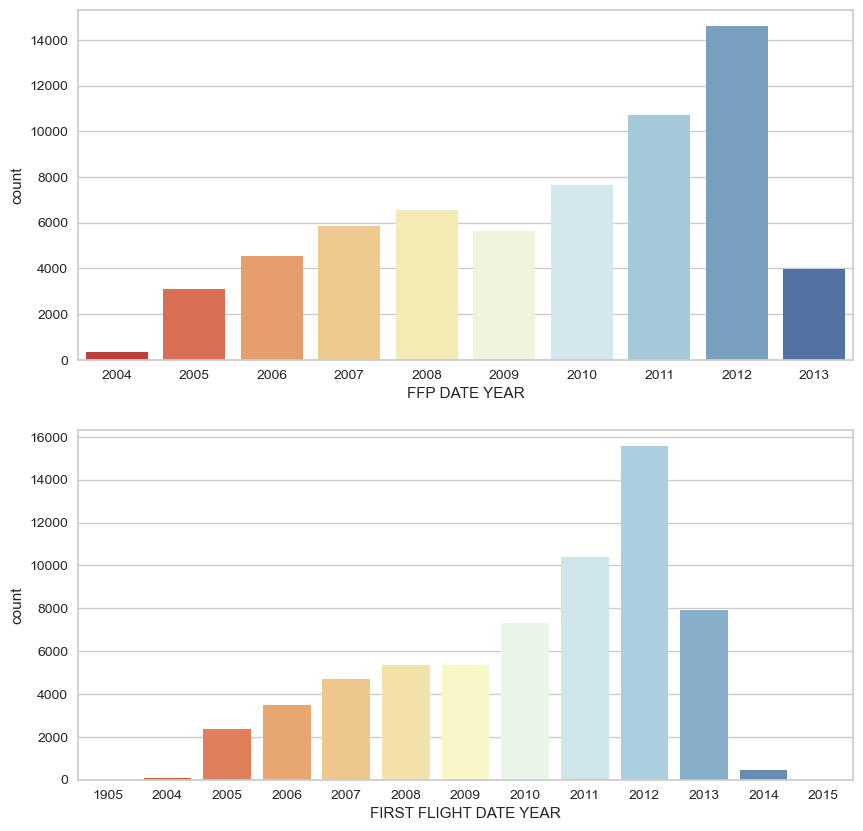

In [35]:
# membuat grafik dengan format 2 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# FFP
# mengubah tipe object ke datetime
FFP = pd.to_datetime(df['FFP_DATE']).dt.year
# visualisasi
sns.countplot(x=FFP,ax=ax[0], palette=('RdYlBu'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
# mengubah tipe object ke datetime
FFD = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=FFD, ax=ax[1], palette=('RdYlBu'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')

Pada feature `LAST_FLIGHT_DATE` ditemukan nilai tanggal 2014/2/29 yang tidak masuk akal karena 2014 bukanlah tahun kabisat.

In [36]:
# mengcopy dataset untuk analisis sementara
df_last = df.copy()

# drop data yang memilik tanggal 2014/2/29
df_last.drop(df_last[df_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

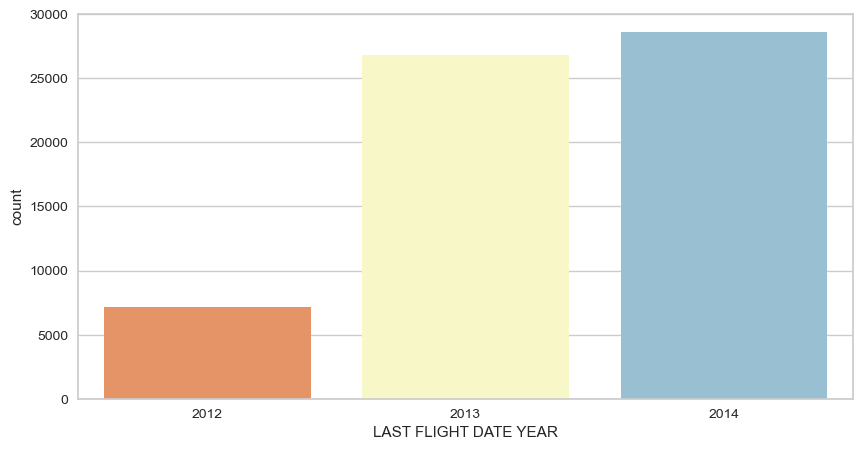

In [37]:
# membuat visualisasi
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
# mengubah tipe object ke datetime
LFD = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=LFD, palette='RdYlBu')
ax.set_xlabel('LAST FLIGHT DATE YEAR')

### Rangkuman

**Hasil :**
- Mayoritas feature memiliki outlier, kecuali MEMBER_NO dan FFP_TIER
- Moyaritas feature memiliki distribusi yang positively skew, kecuali pada MEMBER_NO dan avg_discount cenderung mendekati normal.
- Mayoritas user adalah laki-laki
- Mayoritas feature kategorikal memiliki nilai unik
- LOAD_TIME memiliki 1 nilai yaitu 2014-03-31
- Mayoritas user yang bergabung menjadi membership pada tahun 2012
- Terdapat nilai tahun yang sangat jauh pada featur `FIRST FLIGHT DATE` yaitu 1905
- Pada feature `LAST_FLIGHT_DATE` terdapat nilai tanggal yang tidak masuk akal yaitu tanggal 2014/2/29, tahun tersebut bukan tahun kabisat sehingga tidak ada tanggal 29 di bulan Februari.

## Analisis Multivariate

### Korelasi

In [38]:
# feature yang meiliki type datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

data = df.copy()

# inisialisasi
for col in date_feature:
  data[col] = pd.to_datetime(data[col], errors='coerce')

In [39]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

# The 'object' data type columns are transformed as follows
data.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
0      54993 2006-11-02        2008-12-24       1         6          5   
1      28065 2007-02-19        2007-08-03       1         6       3234   
2      55106 2007-02-01        2007-08-30       1         6          5   
3      21189 2008-08-22        2008-08-23       1         5        898   
4      39546 2009-04-10        2009-04-15       1         6       2102   

   WORK_PROVINCE  WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0            842            24  31.0 2014-03-31  ...  234188.0      580717   
1            842            24  42.0 2014-03-31  ...  167434.0      293678   
2            842            24  40.0 2014-03-31  ...  164982.0      283712   
3            102           104  64.0 2014-03-31  ...  125500.0      281336   
4            926            24  48.0 2014-03-31  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0        2014-03-31            1      3.483254           18              34   
1        2014-03-25            7      5.194245           17              29   
2        2014-03-21           11      5.298507           18              20   
3        2013-12-26           97     27.863636           73              11   
4        2014-03-27            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

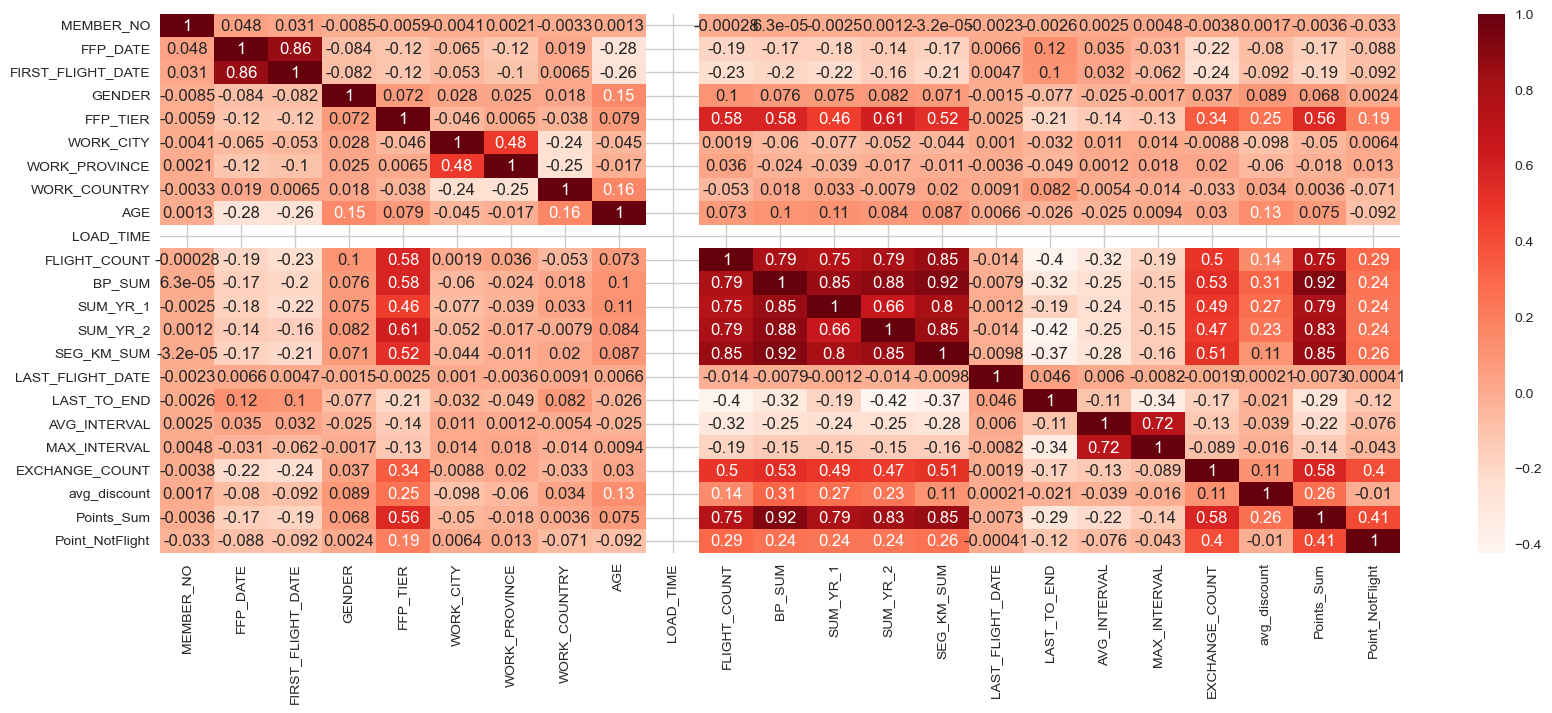

In [40]:
# heatmap korelasi antar feature
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

### Rangkuman:

Feature yang memiliki korelasi tinggi :
- Antara feature-feature `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`
- `AVG_INTERVAL` dengan `MAX_INTERVAL`
- Feature  `FLIGHT_COUNT`, `BP_SUM`,`SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` sangat berkorelasi satu sama lain. Semakin sering pelanggan membeli atau terbang, semakin jauh jarak penerbangan yang ditempuh dan semakin banyak pendapatan tarif.


# Feature Engineering

## Data Cleansing

### Ubah Tipe Data

Sebelum memperbaiki tipe dataset, diputuskan untuk menghapus feature-feature yang tidak relate dan memiliki banyak nilai unik yaitu `MEMBER_NO`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `GENDER`.

In [41]:
# drop kolom
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

Menghapus tanggal 2014/2/29 yang ditemukan pada `LAST_FLIGHT_DATE`.

In [42]:
# menghapus record
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Mengubah tipe yang memiliki feature tanggal dengan datetime.

In [43]:
# feature yang meiliki type datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# inisialisasi
for col in date_feature:
  df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')

df_pre.info()

### Mengatasi Missing Value

In [44]:
df_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [45]:
# Persentase record/rows yang mengandung missing value
df_nan = df_pre[df_pre.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df_pre)*100, 2)}%')

Persentase missing value pada dataset : 1.1%


Dikarenakan missing value hanya sebesar 1.1%, diputuskan untuk menghapusnya karena tidak terlalu signifikan mempengaruhi hasil dalam pemodelan.

In [46]:
# Menghapus baris data dari missing value SUM_YR_1, SUM_YR_2
df_pre = df_pre.dropna()

In [47]:
# cek missing value
df_pre.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Tambahan** <br>
Membersihkan data sesuai dengan prosedur standar untuk dataset penerbangan (Tao, 2020) 
- Record di mana harga tiket (SUM_YR_1,SUM_YR_2) berisi nilai 0, dan diskon rata-rata (avg_discount) bukan nol, dan dimana total jarak tempuh (SEG_KM_SUM) lebih dari nol.
- Hal ini diasumsikan bahwa user tidak memiliki riwayat perjalanan

In [48]:
# drop kolom
df_pre.drop(df_pre[(df_pre['SUM_YR_1'] == 0) & (df_pre['SUM_YR_2'] == 0) & (df_pre['avg_discount'] == 0) & (df_pre['SEG_KM_SUM'] > 0)].index, inplace = True)

In [49]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61871 entries, 0 to 62978
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61871 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61871 non-null  datetime64[ns]
 2   FFP_TIER           61871 non-null  int64         
 3   LOAD_TIME          61871 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61871 non-null  int64         
 5   BP_SUM             61871 non-null  int64         
 6   SUM_YR_1           61871 non-null  float64       
 7   SUM_YR_2           61871 non-null  float64       
 8   SEG_KM_SUM         61871 non-null  int64         
 9   LAST_FLIGHT_DATE   61871 non-null  datetime64[ns]
 10  LAST_TO_END        61871 non-null  int64         
 11  AVG_INTERVAL       61871 non-null  float64       
 12  MAX_INTERVAL       61871 non-null  int64         
 13  EXCHANGE_COUNT     61871 non-null  int64         
 14  avg_discoun

## Feature Selection

Menggunakan LRFMC model. Penjelasan LRFMC menurut Tao (2020) adalah sebagai berikut:
- L (LOYALTY) : Lama waktu user menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
- R (RECENCY) : Jumlah bulan sejak penerbangan terakhir anggota dari akhir waktu observasi.
- F (FREQUENCY) : Total berapa kali user telah terbang selama periode observasi.
- M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi user.
- C (DISCOUNT) : Nilai rata-rata discount factor yang digunakan user selama periode observasi.

Maka feature yang diambil :
- FPP_DATE (Frequent Flyer Program Join Date)
- LOAD_TIME (Tanggal Data Diambil)
- FLIGHT_COUNT (Jumlah Penerbangan Customer)
- AVG_DISCOUNT (Rata-rata Discount yang Diadapat Customer)
- SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
- LAS_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

In [50]:
# select feature
df_feats = df_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [51]:
# membuat feature untuk loyalti dari feature yang sudah ada
df_feats['TIME_MONTH'] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)

In [52]:
df_feats = df_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()

In [53]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61871 entries, 0 to 62978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61871 non-null  int32  
 1   LAST_TO_END   61871 non-null  int64  
 2   FLIGHT_COUNT  61871 non-null  int64  
 3   SEG_KM_SUM    61871 non-null  int64  
 4   avg_discount  61871 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.6 MB


In [54]:
df_feats.sample(5)

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
59619          74          530             2        2353      0.562303
49606          40          467             3        3929      0.717485
40803          26          145             4        6331      0.706685
19926          45          132            11       18270      0.671489
6876           29            1            19       35034      0.803410

## Mengatasi Outliers

In [55]:
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']

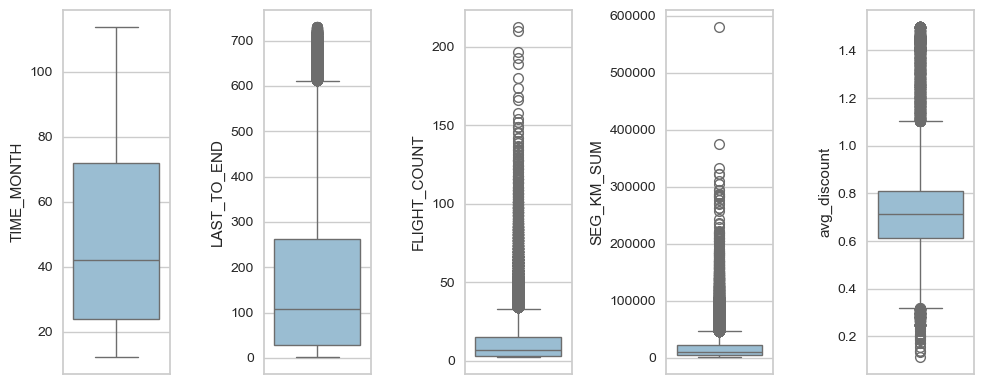

In [56]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [57]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_feats)}')

fil_ent = np.array([True] * len(df_feats))
for col in lrfmc:
    Q1 = df_feats[col].quantile(0.25)
    Q3 = df_feats[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_feats[col] >= low_limit) & (df_feats[col] <= high_limit)) & fil_ent
    
df_feats = df_feats[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_feats))

Jumlah baris sebelum memfilter outlier: 61871
Jumlah baris setelah memfilter outlier 51941


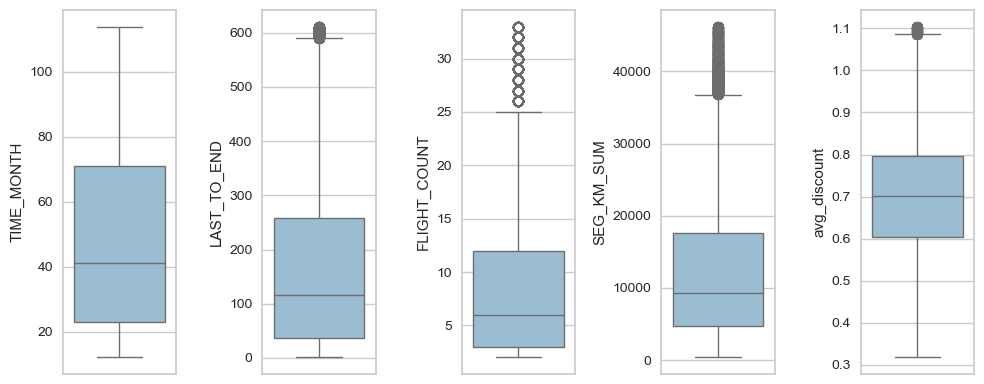

In [58]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [59]:
df_feats=df_feats.drop(columns='index')

## Standarization terhadap Fitur

In [60]:
# melihat statistical summary dataset
df_feats.describe()

TIME_MONTH   LAST_TO_END  FLIGHT_COUNT    SEG_KM_SUM  avg_discount
count  51941.000000  51941.000000  51941.000000  51941.000000  51941.000000
mean      47.767544    169.788163      8.799503  12452.171175      0.699237
std       27.861771    161.301486      7.018834   9920.505724      0.144756
min       12.000000      1.000000      2.000000    368.000000      0.317766
25%       23.000000     37.000000      3.000000   4749.000000      0.603592
50%       41.000000    116.000000      6.000000   9288.000000      0.702210
75%       71.000000    258.000000     12.000000  17566.000000      0.796756
max      114.000000    611.000000     33.000000  46205.000000      1.104105

In [61]:
# mengganti nama feature
df_feats.columns =['L', 'R', 'F', 'M', 'C']

In [62]:
# Standardisasi menggunakan StandardScaler
features = ['L', 'R', 'F', 'M', 'C']
X = df_feats[features].values

X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = features)

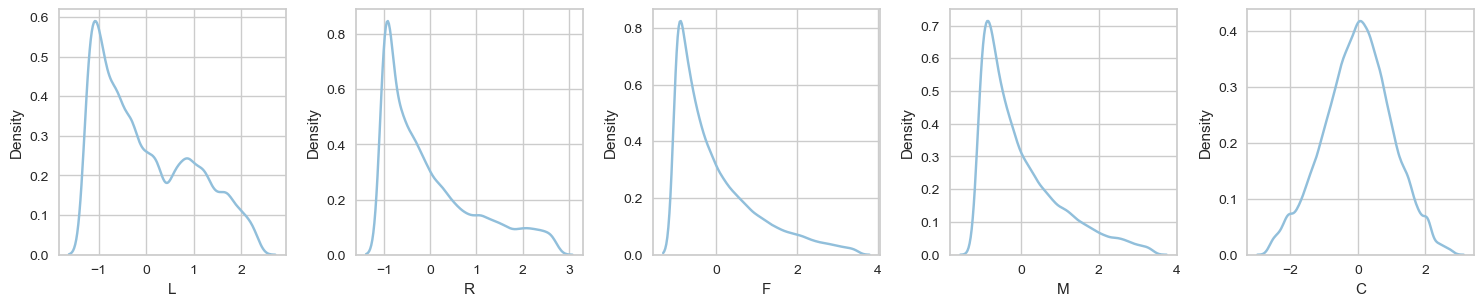

In [63]:
# melihat distribusi data yang telah dilakukan standardisasi
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_std[features[i]], color='#91bfdb')
    plt.xlabel(features[i])
    plt.tight_layout()

In [64]:
# melihat summary statistic
df_std.describe()

L             R             F             M             C
count  5.194100e+04  5.194100e+04  5.194100e+04  5.194100e+04  5.194100e+04
mean  -6.456868e-17  8.317321e-17  1.575914e-16 -8.755075e-18  3.677132e-16
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00
min   -1.283762e+00 -1.046424e+00 -9.687604e-01 -1.218112e+00 -2.635297e+00
25%   -8.889522e-01 -8.232376e-01 -8.262852e-01 -7.764972e-01 -6.607376e-01
50%   -2.428995e-01 -3.334667e-01 -3.988597e-01 -3.189557e-01  2.053675e-02
75%    8.338551e-01  5.468808e-01  4.559913e-01  5.154856e-01  6.736877e-01
max    2.377203e+00  2.735350e+00  3.447970e+00  3.402362e+00  2.796927e+00

In [65]:
df_std=df_std.copy()

# Modeling

Untuk menemukan jumlah cluster yang optimal dalam dataset, maka dilakukan analisis n-cluster menggunakan elbow method dan silhouette score.

## Elbow Method & Silhouette Score

### Elbow Method: Inertia & Distortion Score

In [66]:
inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

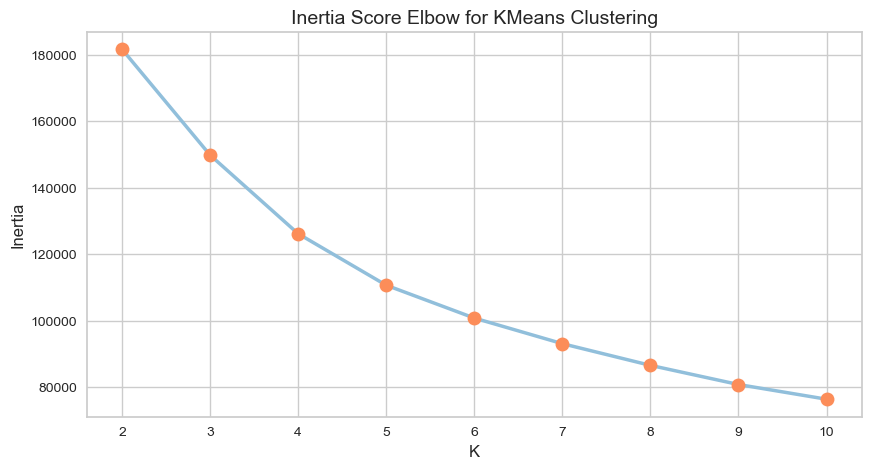

In [67]:
# Visualisasi grafik elbow method
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

Berdasarkan grafik yang dihasilkan tidak terlalu terlihat penurunaan nilai dan patahan yang tajam, sehingga nilai k yang optimal tidak terlalu diketahui dengan pasti.

In [68]:
# analisa lebih lanjut dengan persentase dari inertia
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    17.529307
1    15.792484
2    12.281683
3     8.926546
4     7.646533
5     7.009702
6     6.662291
7     5.473140
8          NaN
dtype: float64

Dari selisih nilai yang dihasilkan, nilai k optimal diantara 2-4.

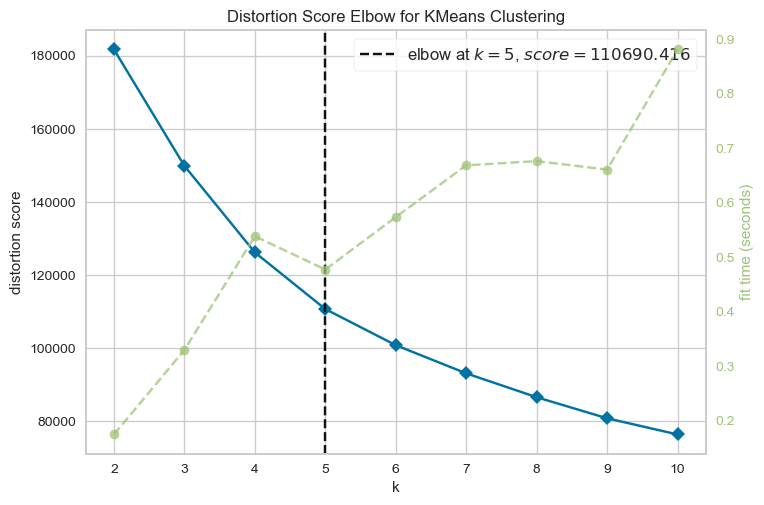

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)       
visualizer.show()

Berdasarkan grafik diatas, dengan parameter distortion nilai optimal k = 5.

### Silhouette Score

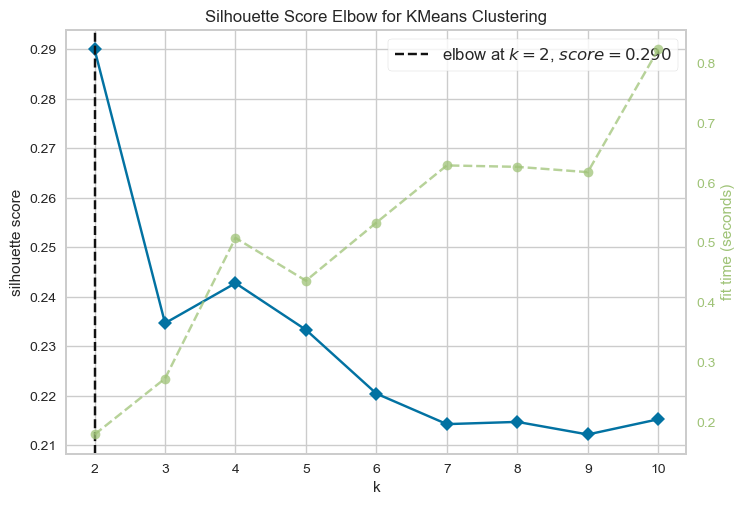

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [70]:
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_std)        
visualizer.show()

Berdasarkan hasil diatas dipeoleh banyak cluster optimal yang terbentuk pada k = 2. Sedangkan opsi keduanya pada k = 4. Karena nilai rata-rata silhoutte tersebut merupakan yang tertinggi dari yang lain.

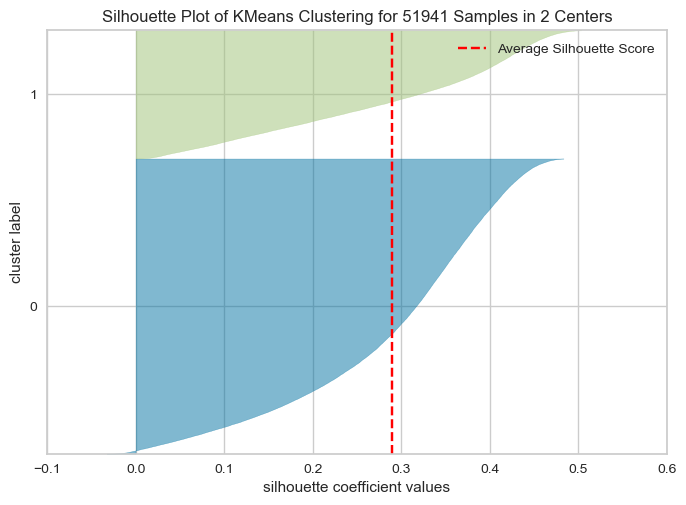

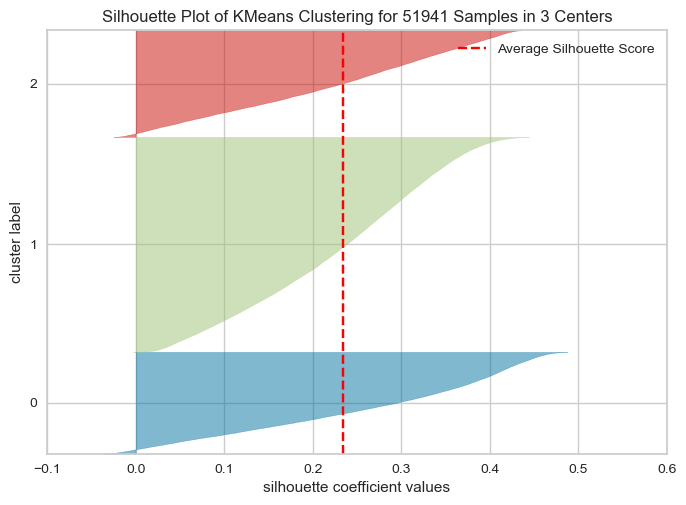

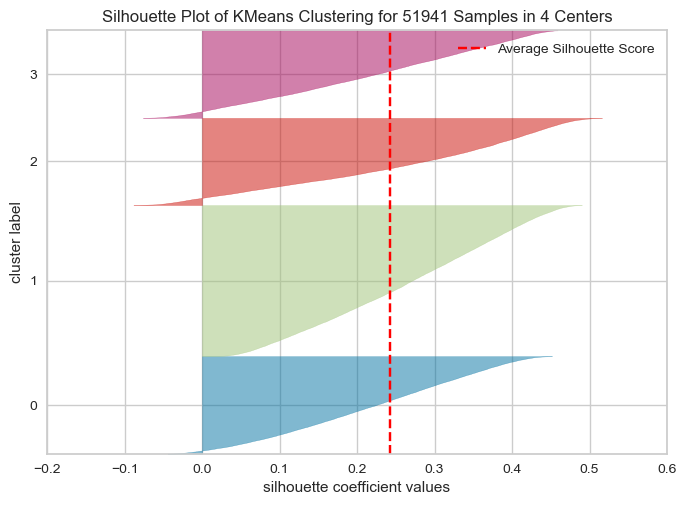

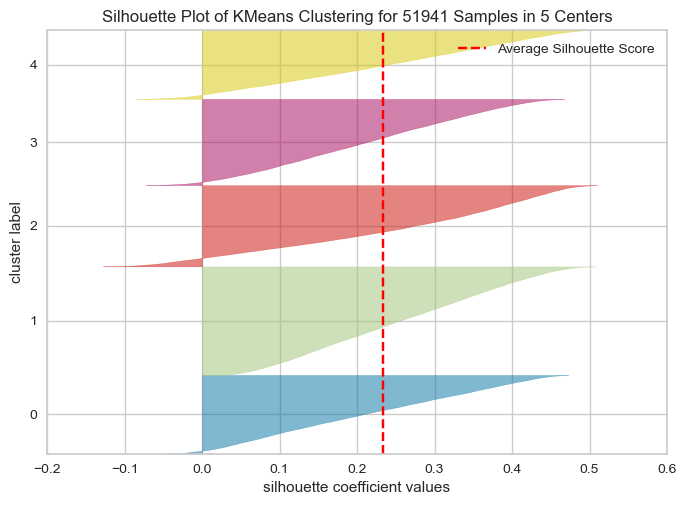

In [71]:
# silhouette plot
for i in [2,3,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_std)        
    visualizer.show()

Berdarkan hasil plot silhouette, untuk menentukan nilai k terbaik harus mempertimbangkan dua faktor yaitu koefisien rata-rata sebesar mungkin, namun tetap lebih kecil dari skor maksimum setiap anggota cluster dan mempertingpangkan ketebalan cluster yang mirip satu sama lain, yang menunjukkan komposisi yang seimbang.

Berdasarkan pertimbangan analisis sebelumnya, maka dipilih k = 5 untuk n-cluster pada analisis K-Means.

## K-Means Clustering

In [72]:
# fit model
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_

In [73]:
df_std.head()

L         R         F         M         C  cluster
0  1.192773 -0.953430  2.735594  3.397020  2.758218        2
1  1.515800 -0.953430  2.878069  3.158925  2.765579        2
2  0.869747 -0.383064 -0.113909  3.341780  2.372683        2
3 -0.135224 -1.009226  2.878069  3.183420  2.487433        2
4  1.085098  1.650415 -0.398860  3.327265  2.213935        2

## Evaluasi Menggunakan PCA dan Visualisasi

In [74]:
# melakukan PCA untuk melihat visualisasi
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

PC 1      PC 2  cluster
0     -0.588724  4.833579        2
1     -0.490947  4.881779        2
2      0.072478  2.765157        2
3     -0.977257  4.345157        2
4      0.980602  2.030834        2
...         ...       ...      ...
51936  2.972279 -0.836903        4
51937  2.589406 -1.313176        4
51938 -1.504264 -3.064435        0
51939  1.639987 -0.117824        3
51940  1.289127 -0.708790        3

[51941 rows x 3 columns]

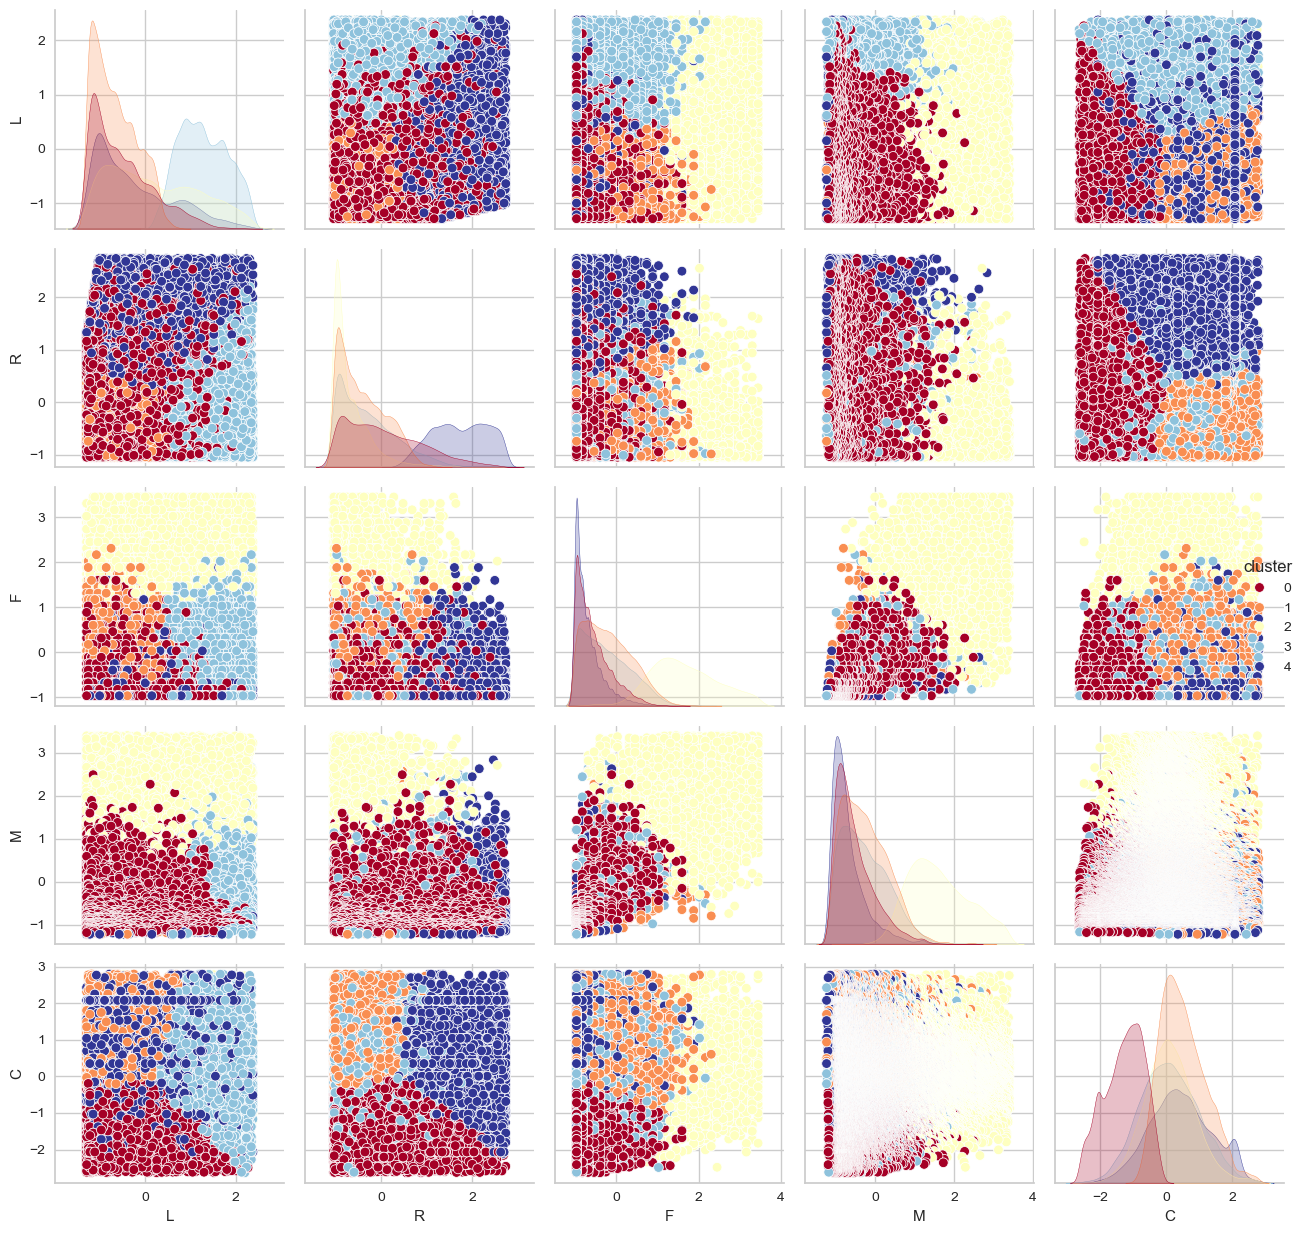

In [75]:
# visualisasi dengan pairplot
sns.pairplot(data=df_std, hue='cluster', diag_kind='kde', palette='RdYlBu')
plt.tight_layout()

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

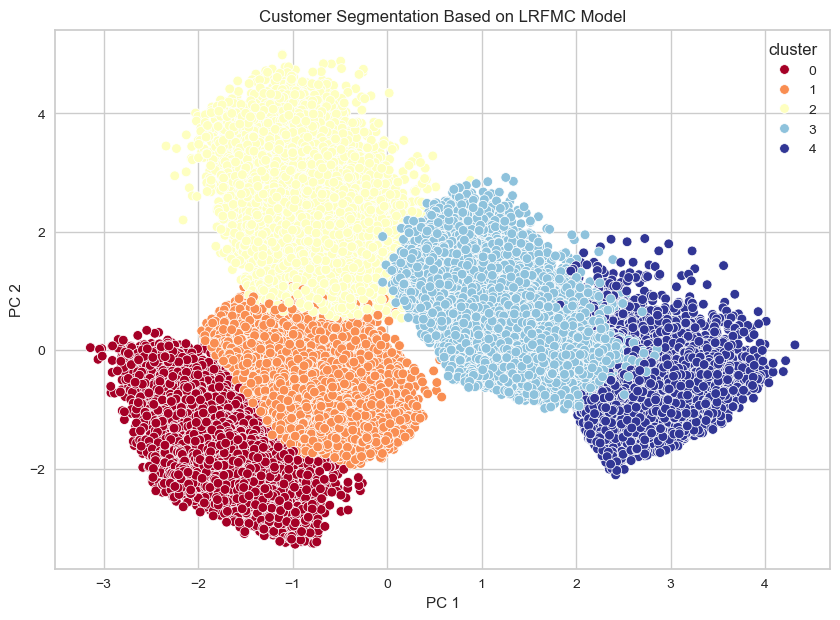

In [76]:
# visualisasi hasil segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')
plt.title('Customer Segmentation Based on LRFMC Model')

# Interpretasi Model dan Rekomendasi

## Add Cluster to DataFrame

In [77]:
# menambahkan cluster ke dataframe
df_feats['cluster'] = kmeans.labels_
display(df_feats.groupby('cluster').agg(['mean','median','min','max']))

L                           R                           F  \
              mean median min  max        mean median  min  max       mean   
cluster                                                                      
0        33.828175   30.0  12  111  180.990063  157.0    1  611   4.851465   
1        29.508785   27.0  12   70  103.790359   86.0    1  384   7.438204   
2        53.280843   49.0  12  114   61.537914   34.0    1  581  20.331595   
3        83.523976   82.0  52  114  122.858035  102.0    1  530   7.109619   
4        41.213089   35.0  12  114  448.465495  449.0  217  611   3.949044   

                                   M                               C  \
        median min max          mean   median   min    max      mean   
cluster                                                                
0          4.0   2  20   7493.263430   6117.0   716  37162  0.513724   
1          7.0   2  25  10091.871828   9308.5   368  40376  0.772666   
2         20.0   3  33  28508.724774  27497.0  5152  46205  0.712989   
3          6.0   2  24  10065.805921   9190.0   368  39469  0.712815   
4          3.0   2  22   5858.712911   4516.0   368  40582  0.762624   

                                       
           median       min       max  
cluster                                
0        0.523651  0.317898  0.690485  
1        0.758900  0.564060  1.104105  
2        0.708684  0.339656  1.102905  
3        0.708798  0.317766  1.103630  
4        0.753135  0.392958  1.104000

## Percentage of Customer

In [78]:
# persentase customer setiap cluster
cluster_count = df_feats['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_std))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

cluster  count  percentage (%)
0        0   9661           18.60
1        1  13318           25.64
2        2   9970           19.19
3        3  10573           20.36
4        4   8419           16.21

Text(0, 0.5, 'Percentage')

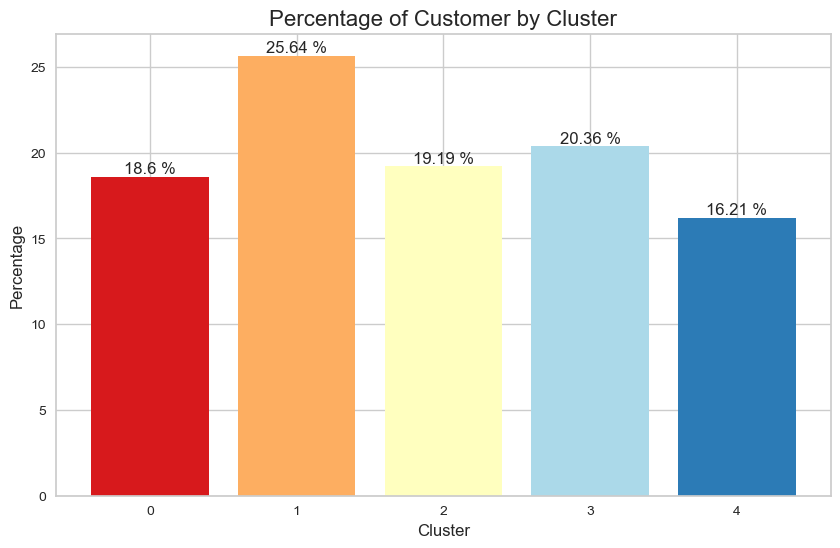

In [79]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

## Segmentation Analysis

Text(0, 0.5, 'Value')

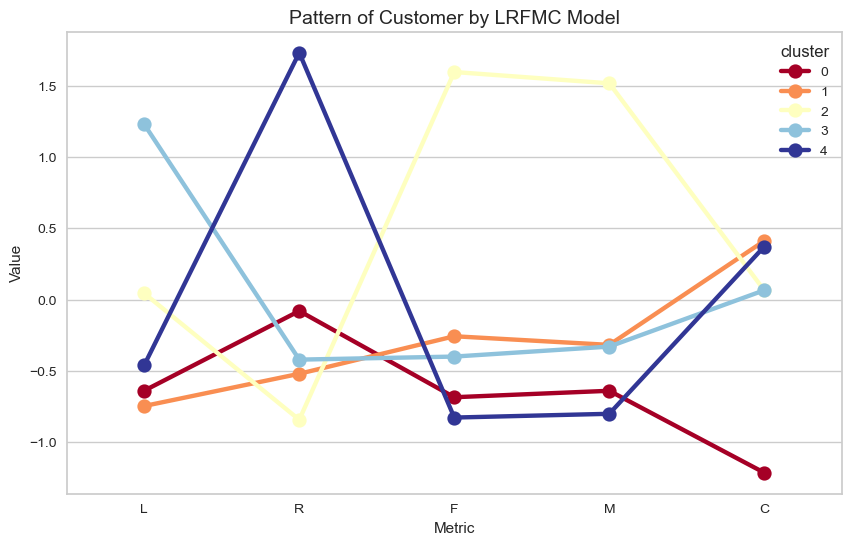

In [80]:
# melihat pola LRFMC pada setiap cluster
cluster_med=df_std.groupby('cluster').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='cluster', value_vars=['L', 'R', 'F','M','C'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster', palette='RdYlBu')
plt.title('Pattern of Customer by LRFMC Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

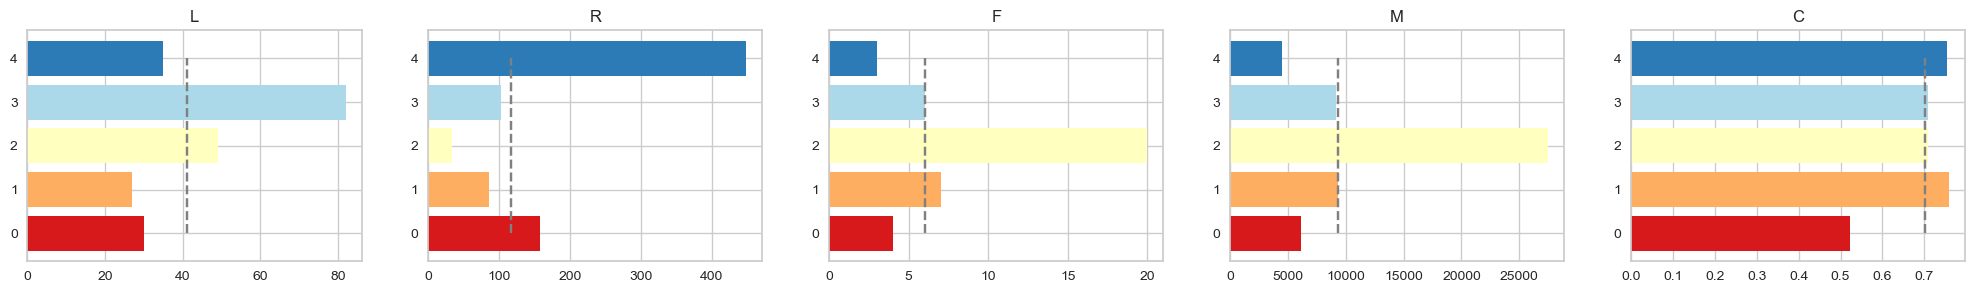

In [81]:
# melihat rata-rata variabel LRFMC antar cluster
LRFMC= ['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_feats[col].median(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = df_feats.groupby('cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c) 
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

Secara keseluruhan cluster-cluster ini terbentuk karena adanya penbedaan indikaror model LRFMC. Berdasarkan hasil analisis dan visualisai dapat diketahui karakteristik customer pada setiap kelompok sebagai berikut:

<p style="text-align: center;">
Tabel 2 - Akumulasi Hasil Nilai LRFMC pada Setiap Cluster
</p> 

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** | R | L C | F M |
| **Cluster 1** | L | F M C  | R |
| **Cluster 2** | F M | L C  | R |
| **Cluster 3** |  | F M C  | L R |
| **Cluster 4** |  | R | L F M C |

**Interpretasi :** <br>
1. Cluster 0 - **Hibernating**
    - Kelompok customer yang telah menjadi member dalam jangka waktu menengah namun tidak sering menggunakan maskapai, nilai frequency dan monetery yang rendah serta recency yang tinggi.

2. Cluster 1 - **Loyal Customers**
    - Kelompok customer yang telah menjadi member dalam jangka waktu paling lama dan memiliki aktivitas penerbangan sedang, rentang waktu untuk melakukan penerbangan tidak terlalu jauh dan cukup sering menggunakan maskapai.

3. Cluster 2 - **Potential Loyalist - The Campions**
    - Kelompok customer yang memliki aktivitas penerbangan yang sangat tinggi, sering menggunakan maskapai dan dengan jarak yang jauh sehingga sangat berpotensi untuk menghasilkan revenue. Kelompok ini juga memiliki tingkat recency yang rendah, artinya rentang waktu untuk melakukan setiap penerbangan tidak terlalu jauh atau. Selain itu customer telah memjadi member sudah cukup lama.

4. Cluster 3 - **Recent User**
    - Kelompok new customer yang baru-baru ini menggunakan maskapai. Hal tersebut dapat dilihat dari waktu bergabung menjadi member belum lama dan memiliki tingkat recency yang rendah, selain itu aktivitas sering tidaknya menggunakan maskapai dan jarak tempuhnya sedang.

5. Cluster 4 - **Need Attention**
    - Kelompok new customer yang memiliki aktivitas dan penggunaan maskapai yang rendah. Kelompok ini juga memiliki tingkat diskon yang didapatkan rendah.

## Business Recommendation

1. Cluster 0 - **Hibernating**
    - Customer yang sudah ada, namun belum menggunakan maskapai baru-baru ini. Dibuttuhkan perlakuan agar customer melakukan pembelian sesegera mungkin, atau perusahaan akan kehilangan kepercayaan dari customer.
    - **Rekomendasi Bisnis :**
         - Mengirimkan email marketing kepada customer di kelompok ini dengan program "We Miss You" dan memberikan spesial voucher atau kode diskon untuk digunakan pada penerbangan yang yang akan datang dengan batas waktu berlaku yang telah ditentukan sebelumnya.

2. Cluster 1 - **Loyal Customer**
    - Kelompok customer yang telah lama menggunakan maskapai. Customer senang dengan layanan yang disediakan dan tidak beralih ke alternatif lain. Penting untuk memberikan perlakuan agar pelanggan merasa dihargai.
    - **Rekomendasi Bisnis :**
         - Mengirimkan email terimakasih "Terimakasih telah Terbang Bersama Kami" dan memberikan kode voucher/diskon untuk penerbangan berikutnya.
         - Memberikan point/reward untuk setiap pemesanan maskapai yang dapat direedem dengan voucher diskon atau produk afiliasi dengan maskapai.

3. Cluster 2 - **Potential Loyalist - The Campions**
    - Sering menggunakan maskapai dan dengan jarak yang jauh. Dapat menjadi kontributor yang signifikan untuk revenue perusahaan. Customer pada kelompok ini harus diperlakukan dengan baik dan hati hati, serta perlu untuk menjadikan customer merasa dihargai agar menjadi loyalis perusahaan.
     - **Rekomendasi Bisnis :**
         - Membangun hubungan baik dengan customer melalui on boarding support seperti dengan menyediakan Flight Booking Assitant.
         - Memberikan souvenir atau merchandise.
         - Memberikan potongan harga untuk pembelian lebih dari satu penerbangan dalam sekali waktu.
         - Memberikan potongan harga/reward spesial apabila terbang dengan mengajak teman.
         - Memberikan point/reward untuk setiap pemesanan maskapai.

4. Cluster 3 - **Recent User**
    - Kelompok yang masih baru menggunakan maskapai, perlu diberikan perlakuan untuk menjadi loyalis customer dalam jangka panjang. Perlu untuk dilakukan monitoring secara kontinue untuk mencegah customer pergi setelah beberapa waktu tertakhir.
    - **Rekomendasi Bisnis :**
         - Mengirimkan email terimakasih "Terimakasih telah Terbang Bersama Kami" dan memberikan kode voucher/diskon untuk penerbangan berikutnya.
         - Memberikan point untuk setiap kali penerbangan.
         - Memberikan reward/voucher/diskon setelah mencapai beberapa penerbangan dalam periode tertentu, misalnya 2 penerbangan dalam 1 tahun.

5. Cluster 4 - **Need Attention**
    - Kelompok Customer baru dengan konsumsi sangat rendah, dapat terjadi karena berbagai macam alasan. Dibutuhkan perlakuan yang dipersonalisasikan dengan demografi dan kebiasaan customer.
     - **Rekomendasi Bisnis :**
         - Mengirimkan personalized campaign atau promo.
         - Mengirimkan newsletter untuk memberitahukan diskon dan program penerbangan yang bermanfaat untuk mendorong pelanggan menggunakan maskapai lagi.